<a href="https://colab.research.google.com/github/mDivya928/CS-5542-Hands-on/blob/main/2_Hands_On.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neural Network Model                                
California Housing Dataset**

Epoch [0/100], Regression Loss: 5.7426
Epoch [10/100], Regression Loss: 1.5621
Epoch [20/100], Regression Loss: 0.8378
Epoch [30/100], Regression Loss: 0.6393
Epoch [40/100], Regression Loss: 0.5467
Epoch [50/100], Regression Loss: 0.4820
Epoch [60/100], Regression Loss: 0.4397
Epoch [70/100], Regression Loss: 0.4190
Epoch [80/100], Regression Loss: 0.4055
Epoch [90/100], Regression Loss: 0.3944
Regression Model - MSE: 0.3932, R² Score: 0.7000


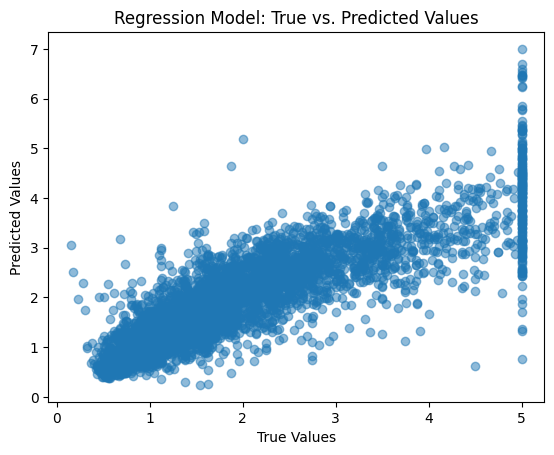

Epoch [0/100], Classification Loss: 0.6957
Epoch [10/100], Classification Loss: 0.4498
Epoch [20/100], Classification Loss: 0.3804
Epoch [30/100], Classification Loss: 0.3660
Epoch [40/100], Classification Loss: 0.3480
Epoch [50/100], Classification Loss: 0.3367
Epoch [60/100], Classification Loss: 0.3244
Epoch [70/100], Classification Loss: 0.3148
Epoch [80/100], Classification Loss: 0.3078
Epoch [90/100], Classification Loss: 0.3012
Classification Model - Accuracy: 0.8680, Precision: 0.8709, Recall: 0.8620, F1-score: 0.8664


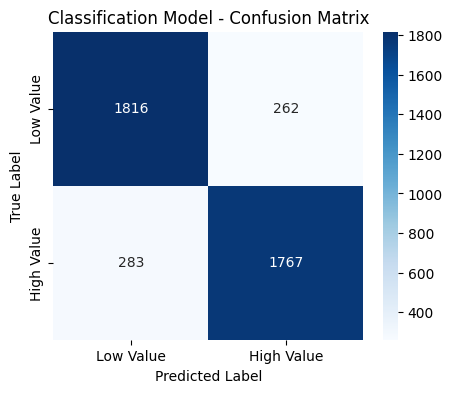

In [1]:
# Import required libraries
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Load California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.reshape(-1, 1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.reshape(-1, 1), dtype=torch.float32)

# Define Feedforward Neural Network Model
class FeedforwardNN(nn.Module):
    def __init__(self, input_size, output_size, classification=False):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_size)
        self.relu = nn.ReLU()
        self.classification = classification
        if classification:
            self.output_activation = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        if self.classification:
            x = self.output_activation(x)
        return x

# Create Regression Model
regression_model = FeedforwardNN(input_size=8, output_size=1, classification=False)

# Define loss function (MSE) and optimizer (Adam)
criterion_regression = nn.MSELoss()
optimizer_regression = optim.Adam(regression_model.parameters(), lr=0.01)

# Train Regression Model
num_epochs = 100
for epoch in range(num_epochs):
    regression_model.train()
    optimizer_regression.zero_grad()
    y_pred_train = regression_model(X_train_tensor)
    loss = criterion_regression(y_pred_train, y_train_tensor)
    loss.backward()
    optimizer_regression.step()

    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Regression Loss: {loss.item():.4f}")

# Evaluate Regression Model
regression_model.eval()
y_pred_test = regression_model(X_test_tensor).detach().numpy()
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Regression Model - MSE: {mse:.4f}, R² Score: {r2:.4f}")

# Plot Predictions vs. True Values
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Regression Model: True vs. Predicted Values")
plt.show()


# CLASSIFICATION TASK


# Create Binary Labels (1 = High value, 0 = Low value based on median)
median_value = np.median(y_train)
y_train_binary = (y_train >= median_value).astype(int)
y_test_binary = (y_test >= median_value).astype(int)

# Convert to PyTorch tensors
y_train_binary_tensor = torch.tensor(y_train_binary.reshape(-1, 1), dtype=torch.float32)
y_test_binary_tensor = torch.tensor(y_test_binary.reshape(-1, 1), dtype=torch.float32)

# Create Classification Model
classification_model = FeedforwardNN(input_size=8, output_size=1, classification=True)

# Define loss function (Binary Cross Entropy) and optimizer (Adam)
criterion_classification = nn.BCELoss()
optimizer_classification = optim.Adam(classification_model.parameters(), lr=0.01)

# Train Classification Model
for epoch in range(num_epochs):
    classification_model.train()
    optimizer_classification.zero_grad()
    y_pred_train_class = classification_model(X_train_tensor)
    loss_class = criterion_classification(y_pred_train_class, y_train_binary_tensor)
    loss_class.backward()
    optimizer_classification.step()

    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Classification Loss: {loss_class.item():.4f}")

# Evaluate Classification Model
classification_model.eval()
y_pred_test_class = classification_model(X_test_tensor).detach().numpy()
y_pred_test_class = (y_pred_test_class > 0.5).astype(int)  # Convert probabilities to binary labels

# Compute Classification Metrics
accuracy = accuracy_score(y_test_binary, y_pred_test_class)
precision = precision_score(y_test_binary, y_pred_test_class)
recall = recall_score(y_test_binary, y_pred_test_class)
f1 = f1_score(y_test_binary, y_pred_test_class)

print(f"Classification Model - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_test_class)

# Plot Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Value", "High Value"], yticklabels=["Low Value", "High Value"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Classification Model - Confusion Matrix")
plt.show()


**RESULTS:**

**Regression Model:** The model predicts house prices fairly well, with an MSE of 0.3932 and R² score of 0.70. The loss kept decreasing over time, showing improvement.                              

**Classification Model:** Reached 86.80% accuracy, with an F1-score of 86.64%, showing balanced performance. Loss also consistently decreased.                                                            

**Overall:** Both models effectively learned patterns, but further tuning, additional features, or deeper architectures could enhance results.                      
                                                       
                                                        
                                                         
                                                          
                                                           
                                                            
                                                             
